In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

In [2]:
df = pd.read_csv('./finance.csv', index_col=0)
df = df[df['Year'] >= 2004]

[Text(0, 0.5, 'Government R&D'),
 Text(0, 1.5, 'Corporate R&D'),
 Text(0, 2.5, 'Venture capital'),
 Text(0, 3.5, 'Private equity expansion capital'),
 Text(0, 4.5, 'Public markets'),
 Text(0, 5.5, 'Asset finance'),
 Text(0, 6.5, 'Asset Finance minus Re-invested equity'),
 Text(0, 7.5, 'Small distributed capacity'),
 Text(0, 8.5, 'Private equity buy-outs'),
 Text(0, 9.5, 'Public markets investor exits'),
 Text(0, 10.5, 'Corporate M&A'),
 Text(0, 11.5, 'Project acquisition & refinancing'),
 Text(0, 12.5, 'Total: M&A/ buy-outs etc.'),
 Text(0, 13.5, 'Number of policies')]

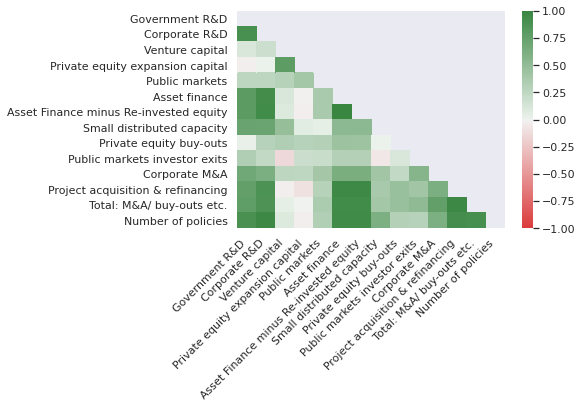

In [5]:
df = df.groupby('Year').sum()
# df.columns = list(keys)
# plt.figure(figsize=(12, 12))

corr = np.round(df.corr(), 2)
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(12, 130, as_cmap=True)
h = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=False, cmap=cmap)
h.set_xticklabels(h.get_xticklabels(), rotation=45, ha='right')
h.set_yticklabels(h.get_yticklabels(), rotation=0, ha='right')

In [4]:
df

,Government R&D,Corporate R&D,Venture capital,Private equity expansion capital,Public markets,Asset finance,Asset Finance minus Re-invested equity,Small distributed capacity,Private equity buy-outs,Public markets investor exits,Corporate M&A,Project acquisition & refinancing,Total: M&A/ buy-outs etc.,Number of policies
Year,,,,,,,,,,,,,,
2004,0.760,0.760,0.160,0.120,0.120,12.840,12.800,3.200,0.320,0.160,0.880,2.040,3.400,21.0
2005,0.800,0.760,0.240,0.400,1.440,20.000,19.920,4.040,1.480,0.920,3.040,5.000,10.480,26.0
2006,0.880,0.880,0.480,1.160,3.560,31.680,30.800,3.600,0.720,1.040,4.120,7.480,13.360,31.0
2007,1.053,0.897,0.819,1.365,7.683,41.457,40.248,5.421,1.287,1.521,7.722,11.661,22.191,32.0
2008,1.064,1.254,1.254,2.546,3.990,50.730,49.058,8.436,1.938,0.342,6.270,13.604,22.154,40.0
2009,2.160,1.320,0.640,1.200,4.680,44.720,43.240,13.880,0.760,0.960,8.960,13.960,24.600,44.0
2010,1.960,1.520,1.040,2.120,4.240,60.880,60.160,24.360,0.760,1.920,7.480,12.800,22.920,46.0
2011,1.824,1.634,0.988,0.912,3.762,72.048,71.250,28.538,1.102,0.076,11.248,16.074,28.500,48.0
2012,1.880,1.640,0.960,0.640,1.520,68.040,66.880,27.960,1.200,0.160,3.720,21.200,26.280,53.0


In [17]:
from sklearn.decomposition import PCA

In [18]:
df = df.loc[2004:2016]
pca = PCA(n_components=1)
pca.fit(df.T)
f = pca.components_[0]
f = f / f.max()

<AxesSubplot:xlabel='Year'>

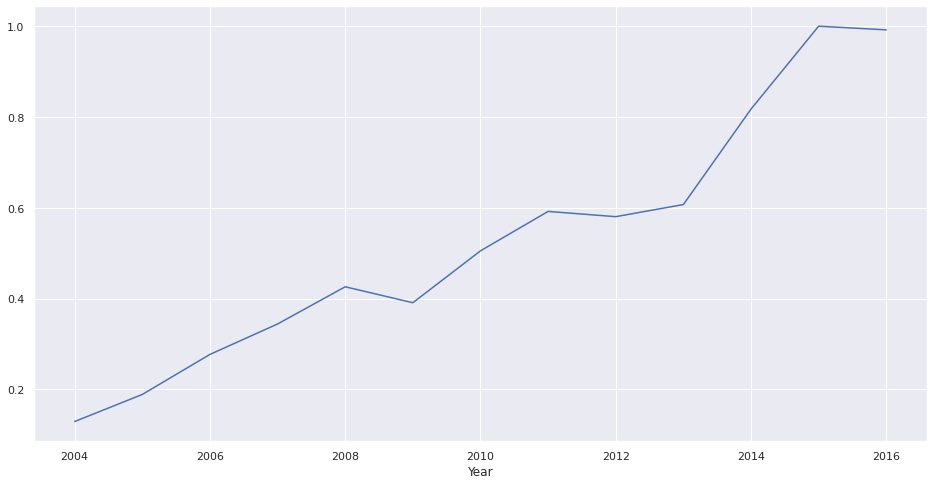

In [19]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=df.index, y=f)